#Scraping Data from Kaggle

In [73]:
pip install kaggle


Install kaggle to begin scrape dataset from Kaggle.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()


In [76]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
!kaggle datasets download -d muratkokludataset/date-fruit-datasets


In [ ]:
!unzip date-fruit-datasets.zip


In [79]:
##from google.colab import files
##files.download('date-fruit-datasets.zip')


A great number of fruits are grown around the world, each of which has various types. The factors that determine the type of fruit are the external appearance features such as color, length, diameter, and shape. The external appearance of the fruits is a major determinant of the fruit type. Determining the variety of fruits by looking at their external appearance may necessitate expertise, which is time-consuming and requires great effort. The aim of this study is to classify the types of date fruit, that are, Barhee, Deglet Nour, Sukkary, Rotab Mozafati, Ruthana, Safawi, and Sagai by using three different machine learning methods. (Source: Kaggle)

#Load Data

In [80]:
df = pd.read_excel('Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx')
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


#Data Preprocessing

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

##Checking Missing Values

In [82]:
df.isnull().sum()
print(df.isnull().sum())

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64


No missing values detected so we can continue to next process, Label Encoding.

In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])


since the 'Class' column contains string data, we need to change it to integers.

#Split Dataset to Train and Test

In [84]:
X = df.drop(columns=['Class'])
y = df['Class']


"Class" is our target for modeling so we will use it as "y" variable and the rest as "X".

In [85]:
print(df['Class'].value_counts())


Class
2    204
5    199
4    166
1     98
6     94
3     72
0     65
Name: count, dtype: int64


In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)


split the dataset to 80% as train and 20% as test.

#Modelling

##Machine Learning

###Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)


we will implement the Random Forest model.

In [88]:
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [89]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Akurasi: 0.9222222222222223
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.78      0.70      0.74        20
           2       0.93      0.95      0.94        41
           3       0.93      1.00      0.97        14
           4       0.97      0.97      0.97        33
           5       0.97      0.97      0.97        40
           6       0.80      0.84      0.82        19

    accuracy                           0.92       180
   macro avg       0.91      0.91      0.91       180
weighted avg       0.92      0.92      0.92       180



The model achieved an overall accuracy of 92%. Class 0 and Class 3 show high precision and recall, with recall reaching 1.00 for Class 3. Class 1 has the lowest recall at 0.70, indicating some missed cases. Most classes have F1-scores above 0.90, except Class 1 (0.74) and Class 6 (0.82). Both macro and weighted averages for precision, recall, and F1-score are around 0.91 to 0.92, reflecting consistent performance across classes.

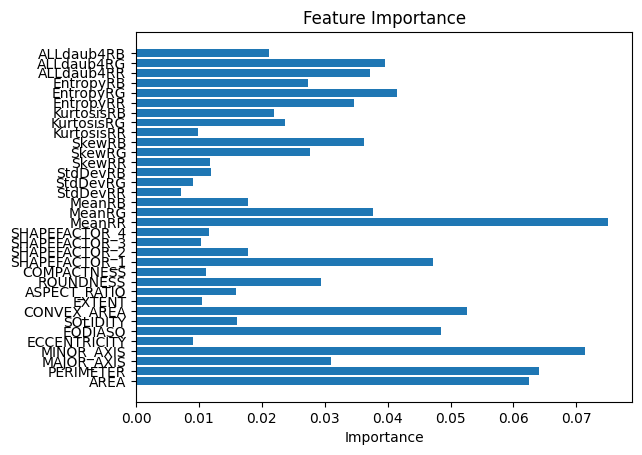

In [90]:
import matplotlib.pyplot as plt
importances = model.feature_importances_
features = X.columns
plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()


MeanRR is the most influential feature for this model,followed by Minor_Axis, Perimeter, and Area.

###KNN

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

pipeline_knn.fit(X_train, y_train)
y_pred_knn = pipeline_knn.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))



KNN Accuracy: 0.9222222222222223
              precision    recall  f1-score   support

       BERHI       1.00      0.92      0.96        13
      DEGLET       0.81      0.85      0.83        20
       DOKOL       0.95      0.95      0.95        41
       IRAQI       0.93      1.00      0.97        14
      ROTANA       0.91      0.94      0.93        33
      SAFAVI       0.97      0.97      0.97        40
       SOGAY       0.82      0.74      0.78        19

    accuracy                           0.92       180
   macro avg       0.91      0.91      0.91       180
weighted avg       0.92      0.92      0.92       180



Just like Random Forest, KNN performs very well with 92% accuracy.

###SVM

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1, gamma='scale'))
])

pipeline_svm.fit(X_train, y_train)
y_pred_svm = pipeline_svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Report:\n", classification_report(y_test, y_pred_svm, target_names=le.classes_))


SVM Accuracy: 0.9277777777777778
SVM Report:
               precision    recall  f1-score   support

       BERHI       1.00      0.92      0.96        13
      DEGLET       0.83      0.75      0.79        20
       DOKOL       0.95      0.95      0.95        41
       IRAQI       0.93      1.00      0.97        14
      ROTANA       0.94      0.97      0.96        33
      SAFAVI       0.97      0.97      0.97        40
       SOGAY       0.80      0.84      0.82        19

    accuracy                           0.93       180
   macro avg       0.92      0.92      0.92       180
weighted avg       0.93      0.93      0.93       180



not significantly different with Random Forest and KNN, SVM performs with 92% accuracy as well.

###XGBoost

In [93]:
pip install xgboost


In [94]:
from xgboost import XGBClassifier

pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

pipeline_xgb.fit(X_train, y_train)
y_pred_xgb = pipeline_xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb, target_names=le.classes_))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:20:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9
XGBoost Report:
               precision    recall  f1-score   support

       BERHI       1.00      0.92      0.96        13
      DEGLET       0.73      0.80      0.76        20
       DOKOL       0.97      0.95      0.96        41
       IRAQI       0.92      0.86      0.89        14
      ROTANA       0.91      0.97      0.94        33
      SAFAVI       0.95      0.95      0.95        40
       SOGAY       0.72      0.68      0.70        19

    accuracy                           0.90       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.90      0.90      0.90       180



on the other hand, XGBoost performs worse than those previous 3 models with 90% accuracy. But the model still performs amazingly, now we will continue to Deep Learning model.

##Deep Learning

In [95]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

scales the features so that they have zero mean and unit variance, which helps the model train faster and more reliably. It also converts the labels into one-hot encoded vectors, a format needed for multi-class classification in Keras.

In [96]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


defines a neural network with two hidden layers and dropout for regularization, ending with a softmax output layer for multi-class classification. The model uses Adam optimizer and categorical cross-entropy loss.

In [97]:
history = model.fit(X_train_scaled, y_train_cat,
                    validation_data=(X_test_scaled, y_test_cat),
                    epochs=50,
                    batch_size=32,
                    verbose=1)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.2839 - loss: 1.8238 - val_accuracy: 0.6944 - val_loss: 0.9117
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7153 - loss: 0.8735 - val_accuracy: 0.7556 - val_loss: 0.5983
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7553 - loss: 0.6553 - val_accuracy: 0.8667 - val_loss: 0.4452
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7994 - loss: 0.5401 - val_accuracy: 0.9000 - val_loss: 0.3638
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8342 - loss: 0.4781 - val_accuracy: 0.9056 - val_loss: 0.3267
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8440 - loss: 0.4248 - val_accuracy: 0.9111 - val_loss: 0.2919
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8431 - loss: 0.3806 - val_accuracy: 0.9222 - val_loss: 0.2657
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8307 - loss: 0.3921 - val_accuracy: 0.9222 - val_loss

The model is trained for 50 epochs with a batch size of 32, using scaled training data and one-hot encoded labels.

In [98]:
loss, acc = model.evaluate(X_test_scaled, y_test_cat, verbose=0)
print(f"\n✅ Test Accuracy: {acc:.4f}")

y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

print("\n🧾 Classification Report:\n")
print(classification_report(y_test, y_pred))



✅ Test Accuracy: 0.9444
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

🧾 Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.85      0.85      0.85        20
           2       0.97      0.95      0.96        41
           3       0.93      1.00      0.97        14
           4       0.94      0.97      0.96        33
           5       0.98      1.00      0.99        40
           6       0.89      0.84      0.86        19

    accuracy                           0.94       180
   macro avg       0.94      0.93      0.94       180
weighted avg       0.94      0.94      0.94       180



Test accuracy reached 94.44%. Most classes show strong precision and recall, with Class 3 and 5 achieving perfect or near-perfect recall. Class 6 has the lowest recall at 0.79. Overall, macro and weighted averages for precision, recall, and F1-score are around 0.93–0.94, indicating balanced and reliable performance across classes.

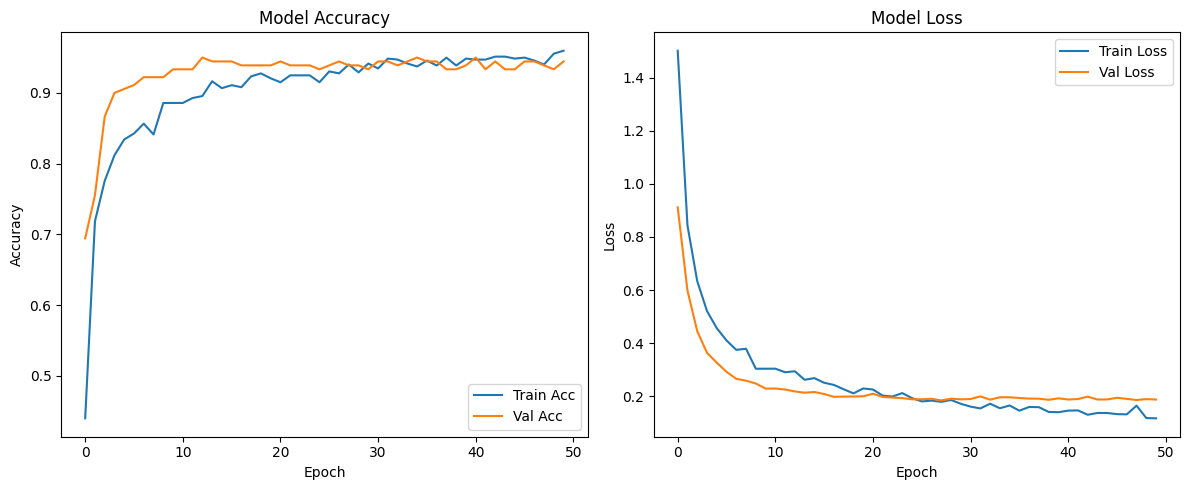

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


The model accuracy increases over time for both training and validation after 10 epochs, then becomes stagnant between epochs 20 and 50, while the model loss decreases over time. Overall, this Keras model works very well with this dataset, so it can be concluded from our experiment that both Machine Learning and Deep Learning models perform well on this dataset.

#Inference

In [100]:
sample = [[70240, 1221.1, 345.0, 285.1, 0.72, 295.1, 0.92, 76300,
           0.85, 1.21, 0.67, 0.88, 0.72, 0.80, 0.76, 0.84,
           124.2, 130.4, 118.1, 9.2, 9.8, 8.6,
           0.1, 0.12, 0.08, -0.2, -0.15, -0.22,
           1.4, 1.3, 1.5, 0.78, 0.74, 0.80]]


Let's test the model by inputting these samples to see how it identifies the fruit types.

In [101]:
import numpy as np

sample_scaled = scaler.transform(sample)

pred_prob = model.predict(sample_scaled)
pred_class = np.argmax(pred_prob, axis=1)[0]

original_class = label_encoder.inverse_transform([pred_class])[0]

print(f"Prediction class: {original_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction class: 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


The model successfully determined that the given sample is fruit number 2. Now, we will see what fruit number 2 is.

In [102]:
pred_class = 2
print("Prediction class (name):", le.inverse_transform([pred_class])[0])



Prediction class (name): DOKOL


Using label encoder transform, we know that fruit number 2 corresponds to DOKOL.